In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting the path of the data
!gdown --id '1pAat3ZaMZHJup7Nk__Bxd64BqOvoaUHy'

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pAat3ZaMZHJup7Nk__Bxd64BqOvoaUHy
To: /content/breast_cancer (2).csv
100% 15.0k/15.0k [00:00<00:00, 15.4MB/s]


In [3]:
df=pd.read_csv('/content/breast_cancer (2).csv')

In [4]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
#Statical Analysis

df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
#Check for null vlaues

df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
df.duplicated().sum()
#Duplicates are there indicates that most people have same type with same signs

234

<Figure size 720x720 with 0 Axes>

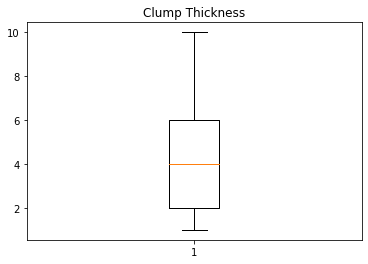

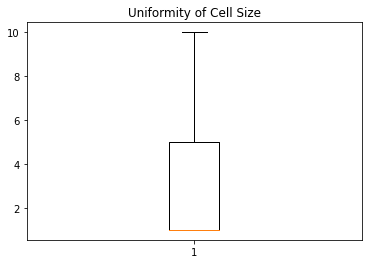

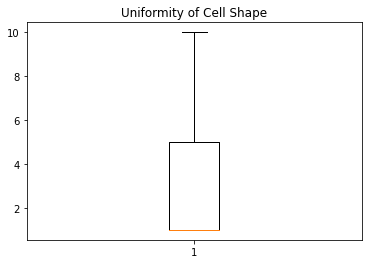

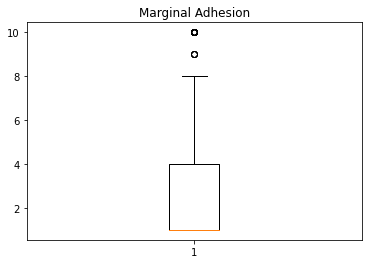

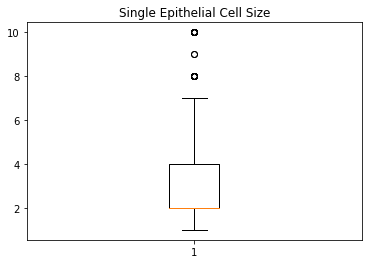

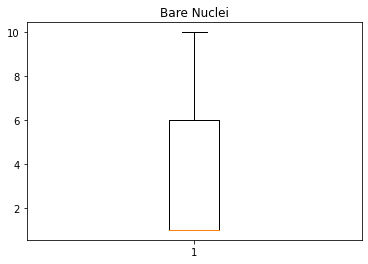

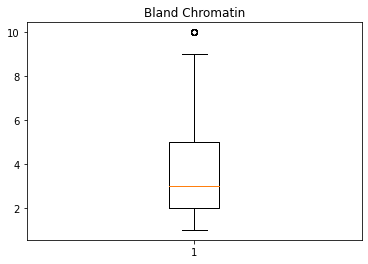

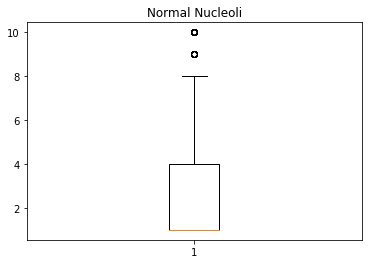

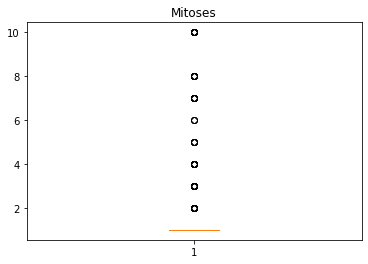

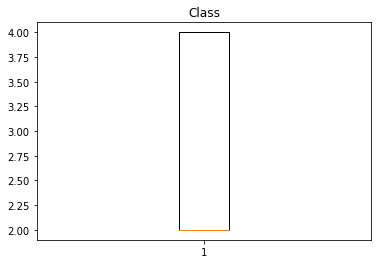

In [9]:
#Outliers detection
plt.figure(figsize=(10,10))
for i in df.columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

Every feature has good shape but some are not like 'Margin Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin','Normal Nucleoli' and Mitroses have many outliers.

In [10]:
#Outliers removing
df.shape

(683, 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


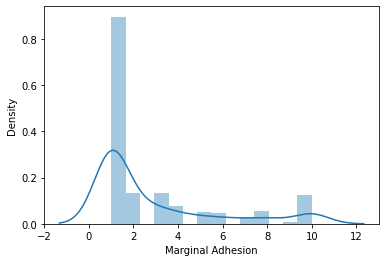

In [11]:
sns.distplot(df['Marginal Adhesion'])

In [12]:
#Removing by threshold quantile
max_threshold=df['Marginal Adhesion'].quantile(0.95)
max_threshold

10.0

In [13]:
#Check for data that is outlier
len(df[df['Marginal Adhesion']>max_threshold])

0

In [14]:
df1=df[df['Marginal Adhesion']<max_threshold]

In [15]:
df1.shape

(628, 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


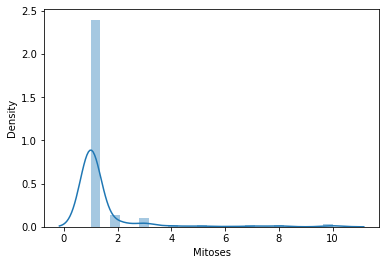

In [16]:
sns.distplot(df1['Mitoses'])

In [17]:
#max_threshold=df1['Mitoses'].quantile(0.95)
#max_threshold

In [18]:
#df1[df1['Mitoses']>max_threshold].shape

In [19]:
#df2=df1[df1['Mitoses']<max_threshold]

In [20]:
#df2

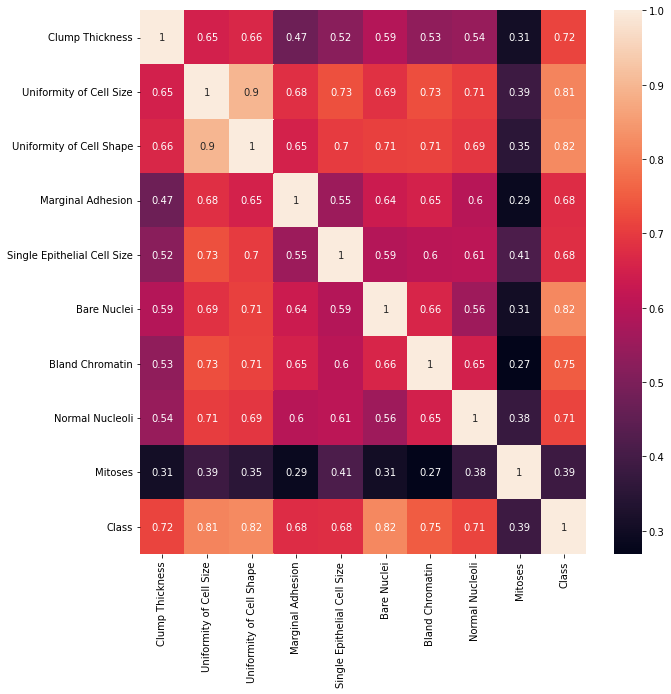

In [21]:
#Let's check for correlation between theme

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

So here is the good relation of Class feature with all the remaing features

In [22]:
#Dependent and independent division
x=df1.drop(['Class'],axis=1)
y=df1['Class']

In [23]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

439 189
439 189


In [24]:
#Applying the model Logistic regression

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(x_train,y_train)
prediction=lr_model.predict(x_test)
lr_model.score(x_test,y_test)

0.9576719576719577

array([[132,   5],
       [  3,  49]])

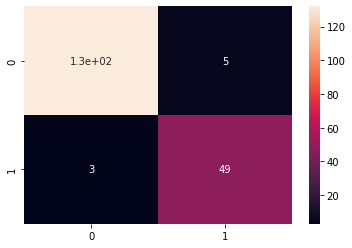

In [25]:
#Let's see the confusion metrics of that model
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
cm


Only few misclassificed data

In [26]:
#Classification report
from sklearn.metrics import classification_report
clr=classification_report(y_test,prediction)
print(clr)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.91      0.94      0.92        52

    accuracy                           0.96       189
   macro avg       0.94      0.95      0.95       189
weighted avg       0.96      0.96      0.96       189



Here the Precision, Recall and F1-score is similar so we don't need to apply any Imbanlanced data techinque.

In [27]:
prediction

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4])

In [28]:
prediction_train=lr_model.predict(x_train)

In [29]:
#Testing
val=np.array([2	,1	,1	,1	,2	,1	,2	,1	,1])
val=val.reshape(1,-1)
single_pre=lr_model.predict(val)
print(single_pre)

[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
df1.sample()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
164,3,1,1,1,2,1,1,1,1,2


# SVM(SVC)


In [31]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_prediction=svc.predict(x_test)

svc.score(x_test,y_test)

0.9629629629629629

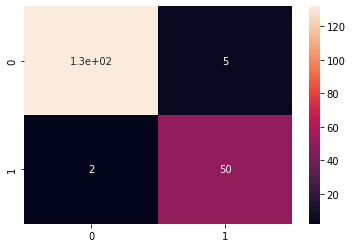

In [32]:
#Confusion Metrics
svc_cm=confusion_matrix(y_test,svc_prediction)
svc_cm

sns.heatmap(svc_cm,annot=True)

In [33]:
#Classification report
svc_cr=classification_report(y_test,svc_prediction)
print(svc_cr)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97       137
           4       0.91      0.96      0.93        52

    accuracy                           0.96       189
   macro avg       0.95      0.96      0.95       189
weighted avg       0.96      0.96      0.96       189



In [34]:
#Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV

svc=SVC()

parameters={'C':[0.1,1.0,10.0,100.0,1000.0],
            'kernel':['poly','rbf','linear','sigmoid'],
            'gamma':[0.00001,0.0001,0.001,0.01,0.1]}


rscv=RandomizedSearchCV(estimator=svc,param_distributions=parameters,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1],
                                        'kernel': ['poly', 'rbf', 'linear',
                                                   'sigmoid']})

In [35]:
rscv.best_score_

0.9727011494252874

In [36]:
rscv.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='linear')

In [37]:
svc=SVC(gamma=0.01)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9629629629629629

# Decision Tree


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)

dt.fit(x_train,y_train)
dt_prediction=dt.predict(x_test)
dt.score(x_test,y_test)

0.9417989417989417

[Text(0.5, 0.9, 'X[2] <= 3.5\nentropy = 0.885\nsamples = 439\nvalue = [306, 133]'),
 Text(0.1875, 0.7, 'X[5] <= 1.5\nentropy = 0.329\nsamples = 315\nvalue = [296, 19]'),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 259\nvalue = [259, 0]'),
 Text(0.25, 0.5, 'X[0] <= 5.5\nentropy = 0.924\nsamples = 56\nvalue = [37, 19]'),
 Text(0.125, 0.3, 'X[5] <= 6.0\nentropy = 0.601\nsamples = 41\nvalue = [35, 6]'),
 Text(0.0625, 0.1, 'entropy = 0.31\nsamples = 36\nvalue = [34, 2]'),
 Text(0.1875, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.375, 0.3, 'X[6] <= 3.5\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.3125, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4375, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.8125, 0.7, 'X[0] <= 6.5\nentropy = 0.404\nsamples = 124\nvalue = [10, 114]'),
 Text(0.75, 0.5, 'X[6] <= 3.5\nentropy = 0.714\nsamples = 51\nvalue = [10, 41]'),
 Text(0.625, 0.3, 'X[1] <= 2.5\nentropy = 0.961\nsamples = 13\nvalue = [8,

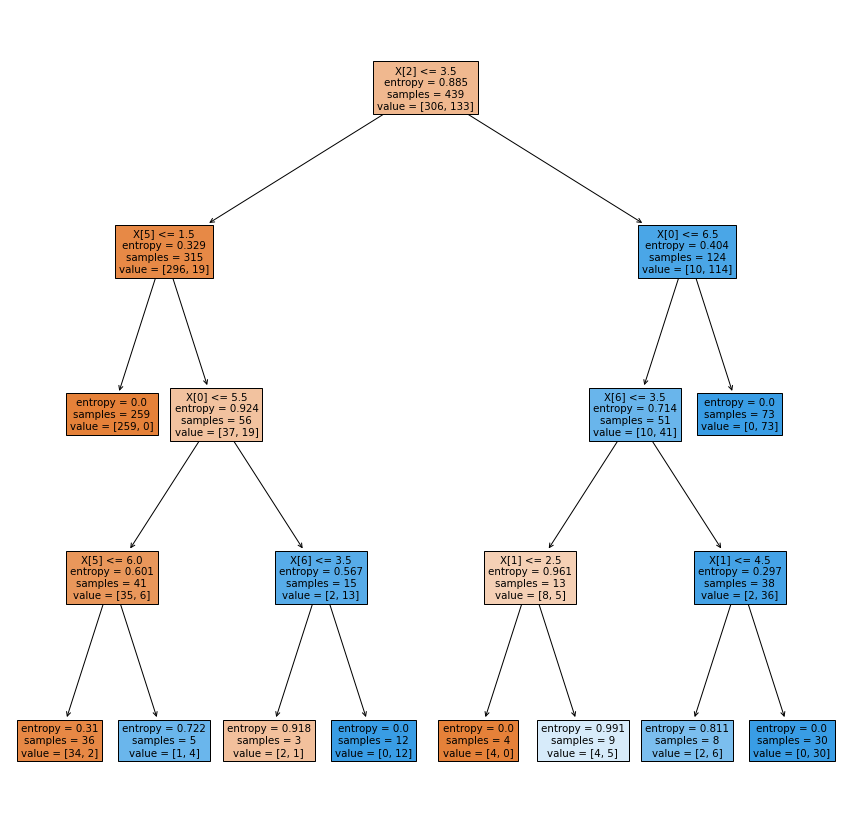

In [39]:
#Plot the tree
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,filled=True)

In [40]:
dt_classification=classification_report(y_test,dt_prediction)
print(dt_classification)

              precision    recall  f1-score   support

           2       0.98      0.94      0.96       137
           4       0.86      0.94      0.90        52

    accuracy                           0.94       189
   macro avg       0.92      0.94      0.93       189
weighted avg       0.94      0.94      0.94       189



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',max_depth=4,min_samples_leaf=2)
rf.fit(x_train,y_train)
rf_prediction=rf.predict(x_test)
rf.score(x_test,y_test)

0.9576719576719577

In [42]:
rf_classification=classification_report(y_test,rf_prediction)
print(rf_classification)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.89      0.96      0.93        52

    accuracy                           0.96       189
   macro avg       0.94      0.96      0.95       189
weighted avg       0.96      0.96      0.96       189



# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_test)
knn.score(x_test,y_test)

0.9629629629629629

array([[132,   5],
       [  2,  50]])

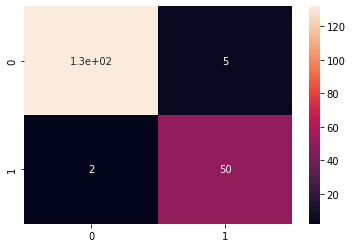

In [44]:
#Confusion metrics
knn_cm=confusion_matrix(y_test,knn_prediction)
sns.heatmap(knn_cm,annot=True)
knn_cm

In [45]:
knn_cr=classification_report(y_test,knn_prediction)
print(knn_cr)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97       137
           4       0.91      0.96      0.93        52

    accuracy                           0.96       189
   macro avg       0.95      0.96      0.95       189
weighted avg       0.96      0.96      0.96       189



# Categorical Naive Baye's

In [46]:
from sklearn.naive_bayes import CategoricalNB
cnb=CategoricalNB()
cnb.fit(x_train,y_train)
cnb_prediction=cnb.predict(x_test)
cnb.score(x_test,y_test)

0.9682539682539683

[[131   6]
 [  0  52]]


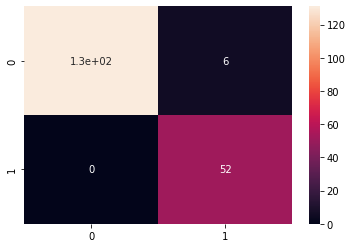

In [47]:
cnb_cm=confusion_matrix(y_test,cnb_prediction)
print(cnb_cm)
sns.heatmap(cnb_cm,annot=True)

In [48]:
cnb_cr=classification_report(y_test,cnb_prediction)
print(cnb_cr)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98       137
           4       0.90      1.00      0.95        52

    accuracy                           0.97       189
   macro avg       0.95      0.98      0.96       189
weighted avg       0.97      0.97      0.97       189



# Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
adb.fit(x_train,y_train)
adb_prediction=adb.predict(x_test)
adb.score(x_test,y_test)

0.9682539682539683

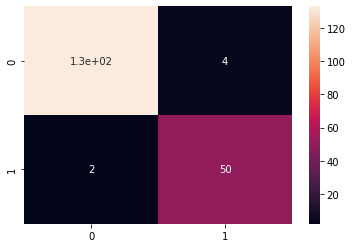

In [50]:
adb_cm=confusion_matrix(y_test,adb_prediction)
adb_cm
sns.heatmap(adb_cm,annot=True)

In [51]:
adb_cr=classification_report(y_test,adb_prediction)
print(adb_cr)

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       137
           4       0.93      0.96      0.94        52

    accuracy                           0.97       189
   macro avg       0.96      0.97      0.96       189
weighted avg       0.97      0.97      0.97       189



# Gradiant Boost

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,
                              max_depth=3,
                              max_leaf_nodes=2
                              )
gb.fit(x_train,y_train)
gb_prediction=gb.predict(x_test)
gb.score(x_test,y_test)

0.9682539682539683

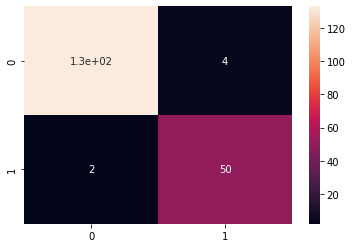

In [53]:
gb_cm=confusion_matrix(y_test,gb_prediction)
gb_cm
sns.heatmap(gb_cm,annot=True)

In [54]:
gb_cr=classification_report(y_test,gb_prediction)
print(gb_cr)

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       137
           4       0.93      0.96      0.94        52

    accuracy                           0.97       189
   macro avg       0.96      0.97      0.96       189
weighted avg       0.97      0.97      0.97       189



# XG Boost

In [61]:
import xgboost
xgb=xgboost.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=100,objective="binary:logistic")
xgb.fit(x_train,y_train)
xgb_prediction=xgb.predict(x_test)
xgb.score(x_test,y_test)

0.9682539682539683

[[132   5]
 [  1  51]]


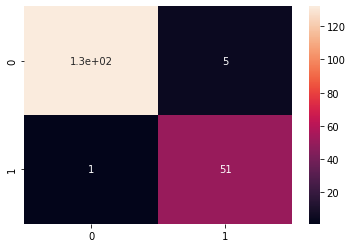

In [58]:
xgb_cm=confusion_matrix(y_test,xgb_prediction)
print(xgb_cm)
sns.heatmap(xgb_cm,annot=True)

In [59]:
xgb_cr=classification_report(y_test,xgb_prediction)
print(xgb_cr)

              precision    recall  f1-score   support

           2       0.99      0.96      0.98       137
           4       0.91      0.98      0.94        52

    accuracy                           0.97       189
   macro avg       0.95      0.97      0.96       189
weighted avg       0.97      0.97      0.97       189

